# 100 Wins For Red Bull Racing: Who Is The Most Dominant Red Bull Racing Driver?
## By: Sam Shade

## Project Description: 
### University of Colorado - Boulder M.S.D.S: DTSA 5304 - Fundamentals of Visualization Project

On Sunday, June 18th, 2023, the Red Bull Racing Formula One team earned their 100th victory at the Montreal Grand Prix, since formally joining in 2005. Throughout its history, the team has had eleven drivers as listed below:

1. David Coulthard (2005 - 2008)
2. Christian Klien (2005 - 2006)
3. Robert Doornbos (2006)
4. Mark Webber (2007 - 2013) 
5. Sebastian Vettel (2009 - 2014)
6. Daniel Ricciardo (2014 - 2018)
7. Max Verstappen (2016 - Current)
8. Pierre Gasly (2019)
9. Alexander Albon (2019 - 2020)
10. Daniil Kyvat (2015 - 2016)
11. Sergio Perez (2021 - Current)

The eleven drivers have all contributed to the team in significant ways; however, there are only a few names that come to mind when you think of dominant Red Bull Racing winners and pole sitters. The project below uses visualization tools to look at the total number of wins from the drivers and a total number of poles to understand preliminarily who the most dominant driver in Red Bull Racing’s history is. These first-level visualizations are considered the Low Fidelity Prototypes, which examine strictly the counts of wins and poles. The second level of visualization under each task examines how additional characteristics (win margins, normalized data to examine how drivers performed against their teammates, etc.) to further investigate who the most dominant driver in Red Bull Racing’s history is. A final evaluation of these visualization tools is provided at the end of the report.

The dataset that was used for this analysis was from the website GP Racing Stats. The statistics were found to be reliable when compared to the F1 website. This dataset was used to keep the number of variables at a minimum without diving too deep into the car telemetry. The link to the three CSV files used for this project are provided below:

1. https://gpracingstats.com/constructors/red-bull/wins/list/
2. https://gpracingstats.com/constructors/red-bull/podiums/list/
3. https://gpracingstats.com/constructors/red-bull/pole-positions/list/


# Import Libraries
The libraries utilized for this project can be found below. This includes seaborn and matplotlib as the primary visualization tools.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rb_wins_df = pd.read_csv("/Users/samshade/Desktop/Colorado MS-DS/DTSA 5304 - Fundamentals of Data Visualization/Red Bull Data/Wins-Table 1.csv")
rb_poles_df = pd.read_csv("/Users/samshade/Desktop/Colorado MS-DS/DTSA 5304 - Fundamentals of Data Visualization/Red Bull Data/Pole-Table 1.csv")
rb_podiums_df = pd.read_csv("/Users/samshade/Desktop/Colorado MS-DS/DTSA 5304 - Fundamentals of Data Visualization/Red Bull Data/Podiums-Table 1.csv")

# Cleaning Data
The datasets used for this project were divided into three different CSV files. Each of these datasets needed to be cleaned and tidied such that they can be merged into one CSV file. This process is found below:

## Wins
The `rb_wins_df` was found with the headers in row one. The headers were cleaned as detailed below. `Year`, `Race no.`, and `Start` were all converted from objects to integers. The `Win margin` column was converted into a float. The `Driver` column was converted into a categorical value.

In [3]:
rb_wins_df.head() #inspsect the wins data frame

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,No.,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin
1,1,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.970s
2,2,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,15.188s
3,3,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,9.252s
4,4,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,4.877s


In [4]:
# clean the dataframe headings
# store the first row as the new column headers
new_headers_wins = rb_wins_df.iloc[0]

# remove the first row from the dataframe
rb_wins_df = rb_wins_df[1:]

# set the new column headers
rb_wins_df.columns = new_headers_wins

# print the modified dataframe
rb_wins_df.head()

,No.,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin
1,1,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.970s
2,2,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,15.188s
3,3,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,9.252s
4,4,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,4.877s
5,5,2009,Brazil,Interlagos,87,Mark Webber,RB5,Renault V8,2,7.626s


In [5]:
# inspect the datatype for each column to figure out which to convert
rb_wins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No.         100 non-null    object
 1   Year        100 non-null    object
 2   Grand Prix  100 non-null    object
 3   Circuit     100 non-null    object
 4   Race no.    100 non-null    object
 5   Driver      100 non-null    object
 6   Chassis     100 non-null    object
 7   Engine      100 non-null    object
 8   Start       100 non-null    object
 9   Win margin  100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [6]:
# specify the columns that need to be converted to integers
rb_wins_df['Race Result'] = 1
rb_wins_df = rb_wins_df.drop('No.', axis=1)
columns_to_convert = ['Year', 'Race no.', 'Start']

# convert the specified columns to integers
rb_wins_df[columns_to_convert] = rb_wins_df[columns_to_convert].astype(int)

# convert the win margin column to float
rb_wins_df['Win margin'] = rb_wins_df['Win margin'].str.rstrip('s')
rb_wins_df['Win margin'] = rb_wins_df['Win margin'].astype(float)

# convert the drivers into categorical
rb_wins_df['Driver'] = rb_wins_df['Driver'].astype('category')

# confirm the data types of the following have been changed
rb_wins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         100 non-null    int64   
 1   Grand Prix   100 non-null    object  
 2   Circuit      100 non-null    object  
 3   Race no.     100 non-null    int64   
 4   Driver       100 non-null    category
 5   Chassis      100 non-null    object  
 6   Engine       100 non-null    object  
 7   Start        100 non-null    int64   
 8   Win margin   100 non-null    float64 
 9   Race Result  100 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 7.5+ KB


In [7]:
# final inspection of the first few rows to ensure everything seems normal. 
rb_wins_df.head()

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin,Race Result
1,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.970,1
2,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,15.188,1
3,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,9.252,1
4,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,4.877,1
5,2009,Brazil,Interlagos,87,Mark Webber,RB5,Renault V8,2,7.626,1


## Poles (Starting First Position)
The `rb_poles_df` was found with limited issues. The `Year` and `Race no.` already had an integer datatype. The `Race` column was converted into an integer. This process required the `Race` value of `DNF` to be replaced with `20`, since recording a DNF (Did Not Finish) usually indicates the driver scored last place. While this value can change in the real world depending on the total number of DNFs in a race, for the same of this project this assumption is considered valid. The `Race` column was also renamed to `Race Result` to better describe the column information. The `Driver` column was converted into a categorical value. The `Pole margin` column was converted into a float. The `Start` column was added and given a value of 1 throughout the dataframe, since this dataset features all of the poles in Red Bull Racing's history.

In [8]:
rb_poles_df.head()

,No.,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Race,Pole margin
0,1,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,0.197s
1,2,2009,Turkey,Istanbul,78,Sebastian Vettel,RB5,Renault V8,3,0.105s
2,3,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,0.347s
3,4,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,0.127s
4,5,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,0.060s


In [9]:
rb_poles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          88 non-null     int64 
 1   Year         88 non-null     int64 
 2   Grand Prix   88 non-null     object
 3   Circuit      88 non-null     object
 4   Race no.     88 non-null     int64 
 5   Driver       88 non-null     object
 6   Chassis      88 non-null     object
 7   Engine       88 non-null     object
 8   Race         88 non-null     object
 9   Pole margin  86 non-null     object
dtypes: int64(3), object(7)
memory usage: 7.0+ KB


In [10]:
rb_poles_df['Race'].unique()

array(['1', '3', '4', 'DNF', '2', '6', '7'], dtype=object)

In [11]:
rb_poles_df[rb_poles_df['Race'] == 'DNF'].count()

No.            7
Year           7
Grand Prix     7
Circuit        7
Race no.       7
Driver         7
Chassis        7
Engine         7
Race           7
Pole margin    5
dtype: int64

In [12]:
rb_poles_df['Race'] = rb_poles_df['Race'].replace('DNF', '20')

In [13]:
rb_poles_df['Start'] = 1
rb_poles_df = rb_poles_df.drop('No.', axis=1)

# convert the pole margin to float
rb_poles_df['Pole margin'] = rb_poles_df['Pole margin'].str.rstrip('s')
rb_poles_df['Pole margin'] = rb_poles_df['Pole margin'].astype(float)

# change race to race result
rb_poles_df = rb_poles_df.rename(columns={'Race': 'Race Result'})
rb_poles_df['Race Result'] = rb_poles_df['Race Result'].astype(int)

# convert the drivers into categorical values
rb_poles_df['Driver'] = rb_poles_df['Driver'].astype('category')

# confirm the data types of the following have been changed
rb_poles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         88 non-null     int64   
 1   Grand Prix   88 non-null     object  
 2   Circuit      88 non-null     object  
 3   Race no.     88 non-null     int64   
 4   Driver       88 non-null     category
 5   Chassis      88 non-null     object  
 6   Engine       88 non-null     object  
 7   Race Result  88 non-null     int64   
 8   Pole margin  86 non-null     float64 
 9   Start        88 non-null     int64   
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 6.6+ KB


In [14]:
rb_poles_df.head()

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Race Result,Pole margin,Start
0,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,0.197,1
1,2009,Turkey,Istanbul,78,Sebastian Vettel,RB5,Renault V8,3,0.105,1
2,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,0.347,1
3,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,0.127,1
4,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,0.060,1


## Podiums
The `rb_podiums_df` was found with limited issues. The `Year`, `Race no.`, and `Race` columns were already an integer datatype. The `Start` value of `PL` was replaced with `20`, since recording a PL (Pit Lane) Start usually indicates the driver had issues that cause them to start at the back (new power units, mechanical issues, etc.). While this value can change in the real world depending on the total number of PL starts in a race, we can consider this assumption valid for the sake of this project. The `Race` column was renamed to `Race Result` to better describe the column information. The `Driver` column was converted into a categorical value. 

In [15]:
rb_podiums_df.head() #inspect the podiums data frame

,No.,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Race
0,1,2006,Monaco,Monte Carlo,25,David Coulthard,RB2,Ferrari V8,7,3
1,2,2007,Europe,Nurburgring,46,Mark Webber,RB3,Renault V8,6,3
2,3,2008,Canada,Montreal,60,David Coulthard,RB4,Renault V8,13,3
3,4,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,1
4,5,2009,China,Shanghai,74,Mark Webber,RB5,Renault V8,3,2


In [16]:
rb_podiums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No.         246 non-null    int64 
 1   Year        246 non-null    int64 
 2   Grand Prix  246 non-null    object
 3   Circuit     246 non-null    object
 4   Race no.    246 non-null    int64 
 5   Driver      246 non-null    object
 6   Chassis     246 non-null    object
 7   Engine      246 non-null    object
 8   Start       246 non-null    object
 9   Race        246 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 19.3+ KB


In [17]:
rb_podiums_df['Start'].unique()

array(['7', '6', '13', '1', '3', '5', '4', '8', '2', '18', '10', 'PL',
       '9', '16', '20', '14', '15'], dtype=object)

In [18]:
rb_podiums_df[rb_podiums_df['Start'] == 'PL'].count()

No.           1
Year          1
Grand Prix    1
Circuit       1
Race no.      1
Driver        1
Chassis       1
Engine        1
Start         1
Race          1
dtype: int64

In [19]:
# first analysis showed that PL couldn't be turned into an integer value; pit lane is usually at the end so it was given the value 20
rb_podiums_df['Start'] = rb_podiums_df['Start'].replace('PL', '20')

In [20]:
rb_podiums_df = rb_podiums_df.drop('No.', axis=1)

rb_podiums_df['Start'] = rb_podiums_df['Start'].astype(int)

# Change race to result
rb_podiums_df = rb_podiums_df.rename(columns={'Race': 'Race Result'})

# Convert the drivers into categorical values
rb_podiums_df['Driver'] = rb_podiums_df['Driver'].astype('category')

# Confirm the data types of the following have been changed
rb_podiums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         246 non-null    int64   
 1   Grand Prix   246 non-null    object  
 2   Circuit      246 non-null    object  
 3   Race no.     246 non-null    int64   
 4   Driver       246 non-null    category
 5   Chassis      246 non-null    object  
 6   Engine       246 non-null    object  
 7   Start        246 non-null    int64   
 8   Race Result  246 non-null    int64   
dtypes: category(1), int64(4), object(4)
memory usage: 16.1+ KB


In [21]:
rb_podiums_df.head()

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Race Result
0,2006,Monaco,Monte Carlo,25,David Coulthard,RB2,Ferrari V8,7,3
1,2007,Europe,Nurburgring,46,Mark Webber,RB3,Renault V8,6,3
2,2008,Canada,Montreal,60,David Coulthard,RB4,Renault V8,13,3
3,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,1
4,2009,China,Shanghai,74,Mark Webber,RB5,Renault V8,3,2


## Merging to Make the Final Dataset

Now that all three data sets have been cleaned, we can merge them into a single dataframe. This final dataframe `rb_final_df` will contain the following columns. 

- `Year`: the year in which the win, podium, pole, etc. occured.
- `Grand Prix`: the city or country that the Grand Prix is named after. The Grand Prix is the formal name for the racing competition.
- `Circuit`: the name of the race track/city in which the event occured.
- `Race no.`: the chronological number in which the race occurred. 
- `Driver`: the name of the driver from the aforementioned list
- `Chassis`: the name of the car's chassis.
- `Engine`: the manufacturer of the car's engine and the name of the engine.
- `Start`: the race starting position for the event for the driver (1-20, PL or Pit Lane).
- `Win margin`: the time difference between the winning driver and second place in seconds.
- `Race Result`: the finishing position for the driver (1-20, DNF or Did Not Finish).
- `Pole margin`: the time difference between the polesitter's qualifying time and the second position's qualifying time in seconds. 

In [22]:
rb_wins_poles = pd.merge(rb_wins_df, rb_poles_df, on=['Race no.', 'Driver', 'Year',
                                                      'Grand Prix', 'Circuit', 'Chassis',
                                                      'Engine', 'Race Result', 'Start'], how = 'outer')
rb_wins_poles = rb_wins_poles.sort_values(by='Race no.')
rb_wins_poles.head()

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin,Race Result,Pole margin
0,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.970,1,0.197
100,2009,Turkey,Istanbul,78,Sebastian Vettel,RB5,Renault V8,1,NaN,3,0.105
1,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,15.188,1,0.347
2,2009,Germany,Nurburgring,80,Mark Webber,RB5,Renault V8,1,9.252,1,0.127
3,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,4.877,1,0.060


In [23]:
rb_wins_poles['Start'].unique()

array([ 1,  2,  3,  6,  4,  5, 10, 14,  7,  9])

In [24]:
rb_wins_poles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Year         136 non-null    int64   
 1   Grand Prix   136 non-null    object  
 2   Circuit      136 non-null    object  
 3   Race no.     136 non-null    int64   
 4   Driver       136 non-null    category
 5   Chassis      136 non-null    object  
 6   Engine       136 non-null    object  
 7   Start        136 non-null    int64   
 8   Win margin   100 non-null    float64 
 9   Race Result  136 non-null    int64   
 10  Pole margin  86 non-null     float64 
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 12.0+ KB


In [25]:
rb_final_df = pd.merge(rb_wins_poles, rb_podiums_df, on=['Race no.', 'Driver', 'Year',
                                                      'Grand Prix', 'Circuit', 'Chassis',
                                                      'Engine', 'Race Result', 'Start'], how = 'outer')
rb_final_df = rb_final_df.sort_values(by='Race no.')

In [26]:
rb_final_df.head()

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin,Race Result,Pole margin
136,2006,Monaco,Monte Carlo,25,David Coulthard,RB2,Ferrari V8,7,NaN,3,NaN
137,2007,Europe,Nurburgring,46,Mark Webber,RB3,Renault V8,6,NaN,3,NaN
138,2008,Canada,Montreal,60,David Coulthard,RB4,Renault V8,13,NaN,3,NaN
139,2009,China,Shanghai,74,Mark Webber,RB5,Renault V8,3,NaN,2,NaN
0,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.97,1,0.197


In [27]:
rb_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 136 to 135
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Grand Prix   260 non-null    object 
 2   Circuit      260 non-null    object 
 3   Race no.     260 non-null    int64  
 4   Driver       260 non-null    object 
 5   Chassis      260 non-null    object 
 6   Engine       260 non-null    object 
 7   Start        260 non-null    int64  
 8   Win margin   100 non-null    float64
 9   Race Result  260 non-null    int64  
 10  Pole margin  86 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 24.4+ KB


# Goal: Who is the most dominant driver in Red Bull Racing history?
The goal of this project is statistically examine which driver is the most dominant in Red Bull Racing history through two tasks: which driver has the most wins, and which driver has the most poles. Each task will then be further examined to better confirm the driver's success.

# Task 1: Who has the most wins?
- **Why is this task pursued?:** The goal is to find out who is the most dominant driver in Red Bull Racing's history, and the first task in deciding the most dominant driver is to examine the total number of wins for each driver. Wins are one of the most obvious statistics in indicating a driver's success.
- **How is this task conducted?:** A quick examination of the overall total wins by each driver was considered the low-fidelity prototype, which allowed the user to see which driver has the most wins overall. The second round of visualizations examined other characteristics of the driver's wins (margins, how the better driver performed against their teammates, etc.) to try and understand the quality of wins from the top drivers.
- **What does a task seek to learn about the data?:** The task seeks to learn which driver throughout the 100 team wins of Red Bull Racing has the most wins and has the most impressive wins.
- **Where does the task operate?:** The target data in which the task operates are statistics which the author has found valuable to him in his experience watching Formula 1. Win margin, winning streaks, and other characteristics are brought into examine not just the number of wins, but the magnitude of the win. Other target data would include vehicle telemetry, to identify how the car is performing in concert with the driver.
- **When is the task performed?:** The task is performed whenever additional races occur. For this scenario, the only additional tasks to be performed for future Red Bull wins at this time are Max Verstappen and Sergio Perez, the two current drivers for Red Bull Racing. The team can additionally introduce new drivers in the future; however, the scope of this project is to examine the first 100 wins for the team.
- **Who is executing the task?:** The ones executing the tasks are the drivers. They are almost entirely responsible for the race result.

In [28]:
#first create a dataframe, wins_by_driver, to showcase the drivers win total each year.
wins_by_driver = rb_final_df[rb_final_df['Race Result'] == 1].groupby(['Year', 'Driver']).size().reset_index(name='Wins')

In [29]:
#inspect the wins_by_driver dataframe
wins_by_driver

,Year,Driver,Wins
0,2009,Mark Webber,2
1,2009,Sebastian Vettel,5
2,2010,Mark Webber,4
3,2010,Sebastian Vettel,5
4,2011,Mark Webber,1
5,2011,Sebastian Vettel,11
6,2012,Mark Webber,2
7,2012,Sebastian Vettel,5
8,2013,Sebastian Vettel,13
9,2014,Daniel Ricciardo,3


## Sketch 1: Low Fidelity Prototype Visual for Task 1 - Total Wins By Drivers Per Year

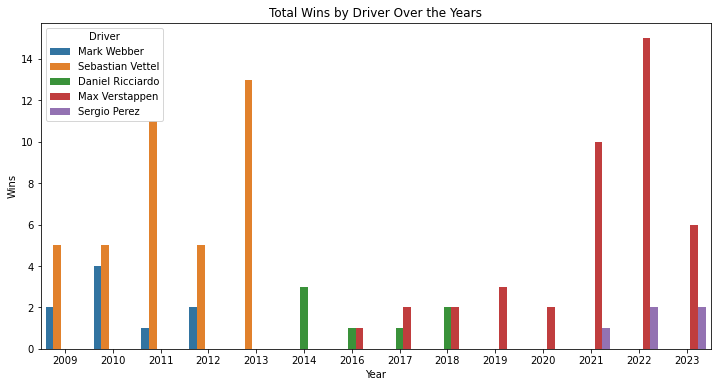

In [30]:
#plot each driver's wins each year
plt.figure(figsize=(12, 6))
sns.barplot(data=wins_by_driver, x='Year', y='Wins', hue='Driver')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Total Wins by Driver Over the Years')
plt.legend(title='Driver')
plt.show()

## Conclusions From Sketch One:
We see that two obvious drivers stand out the most based on this graph, Max Verstappen and Sebastian Vettel; however, looking at each driver's performance, each year does not best visualize the absolute total number of wins. The reader can try to assume that either Vettel or Verstappen has the most amount of wins, but it is not obvious. A second sketch will be built out to indicate the total driver wins to give a clearer indication of who has the most overall wins.

In [31]:
#first create a dataframe, total_driver_wins, to showcase the drivers win total throughout RBR history.
total_driver_wins = rb_final_df[rb_final_df['Race Result'] == 1].groupby(['Driver']).size().reset_index(name='Wins')
total_driver_wins

,Driver,Wins
0,Daniel Ricciardo,7
1,Mark Webber,9
2,Max Verstappen,41
3,Sebastian Vettel,39
4,Sergio Perez,5


## Sketch 2: Low Fidelity Prototype Visual for Task 1 - Total Wins By Drivers 

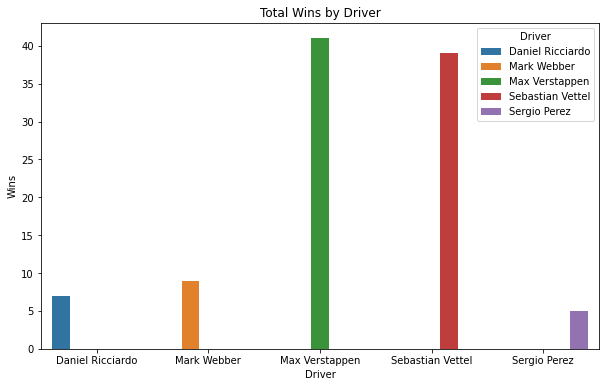

In [32]:
#plot each driver's win total
plt.figure(figsize=(10, 6))
sns.barplot(data=total_driver_wins, x='Driver', y='Wins', hue='Driver')
plt.xlabel('Driver')
plt.ylabel('Wins')
plt.title('Total Wins by Driver')
plt.legend(title='Driver')
plt.show()

## Conclusions From Sketch Two:
We confirm our previous hypothesis from Sketch One that Max Verstappen and Sebastian Vettel are significantly ahead in wins, and that Verstappen edges Vettel in this category very slightly.
What can we further analyze in further prototypes to understand how dominant these wins were? We dive further into these wins by examining the following:

- Longest Win Streak
- Wins Against Teammate
- Most Overtakes in Wins

## Longest Win Streak
Winning once in Formula 1 is very difficult, but holding a streak is even more challenging. This is the first variable we will further expand on in Task 1: Wins. 

In [33]:
def longest_win_streak_per_driver(rb_wins_df):
    # sort the dataframe by driver and race number.
    rb_wins_df = rb_wins_df.sort_values(['Driver', 'Race no.'])

    # initialize variables
    current_streak = 0
    longest_streak = 0
    previous_race_number = None

    # iterate over each row in the df
    for _, row in rb_wins_df.iterrows():
        if previous_race_number is None or row['Race no.'] == previous_race_number + 1:
            # consecutive win, increment current streak
            current_streak += 1
        else:
            # non-consecutive win, reset current streak
            current_streak = 1

        # update the longest streak if necessary
        if current_streak > longest_streak:
            longest_streak = current_streak

        previous_race_number = row['Race no.']

    return longest_streak

# group the dataframe by driver - calculate the longest win streak per driver
result = rb_wins_df.groupby('Driver').apply(longest_win_streak_per_driver)
print(result)

Driver
Daniel Ricciardo    2
Mark Webber         2
Max Verstappen      5
Sebastian Vettel    9
Sergio Perez        1
dtype: int64


## Sketch 3: Secondary Prototype Visual for Task 1 - Longest Win Streak By Driver

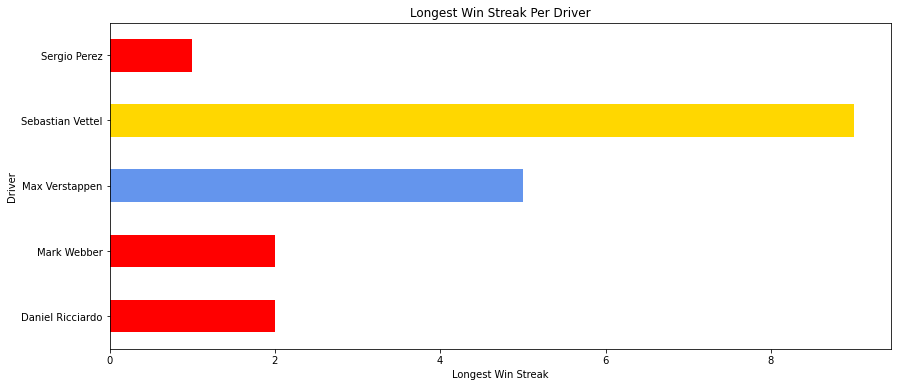

In [34]:
plt.figure(figsize=(14, 6))
result.plot(kind='barh', color=['red','red','cornflowerblue','gold', 'red'])
plt.ylabel('Driver')
plt.xlabel('Longest Win Streak')
plt.title('Longest Win Streak Per Driver')
plt.show()

## Conclusions From Sketch Three:
Sebastian Vettel's 9-win streak is not only the longest in Red Bull Racing history but also in Formula 1 history. Max still has a very impressive 5 win streak, but this accolade that Vettel has achieved is very impressive and earns him more favoritism as the most dominant Red Bull Racing driver.

## Wins Per Year vs. Teammate (Vettel, Verstappen):
Examining the wins per year vs. the other Red Bull Racing Driver helps analyze the driver without the performance of the car. The car’s performance tends to play a heavy factor in team and driver success, and eliminating this from the equation helps identify which driver is performing better. 

## Sketch 4: Secondary Prototype Visual for Task 1 - Wins Per Year Against Teammate (Vettel, Verstappen)

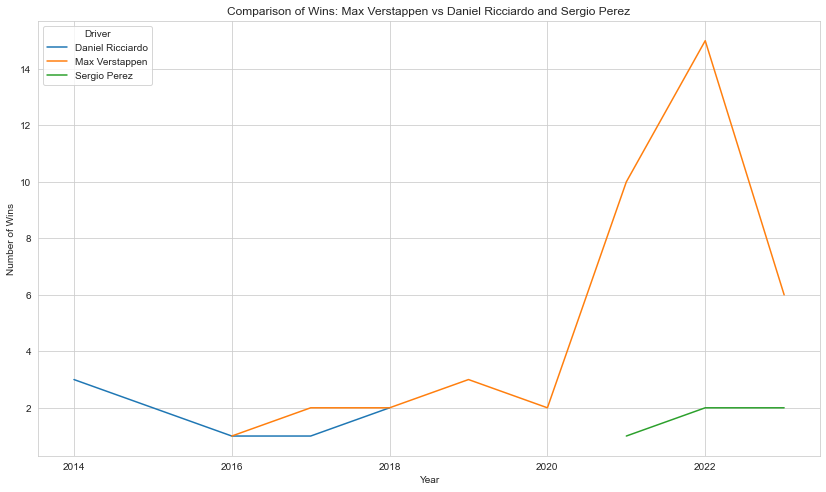

In [35]:
# Verstappen has competed against Sergio Perez and Daniel Ricciardo at RBR; 
# Verstappen competed against other drivers who did not record a win (Gasly, Albon)
driver1 = "Max Verstappen"
driver2 = "Daniel Ricciardo"
driver3 = "Sergio Perez"

# filter the dataframe for the aforementioned drivers
max_team = wins_by_driver[(wins_by_driver['Driver'].isin([driver1, driver2, driver3]))]

# Create a line plot to compare wins
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

sns.lineplot(data=max_team, x='Year', y='Wins', hue='Driver')

plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Comparison of Wins: {} vs {} and {}'.format(driver1, driver2, driver3))
plt.legend(title='Driver')
plt.show()

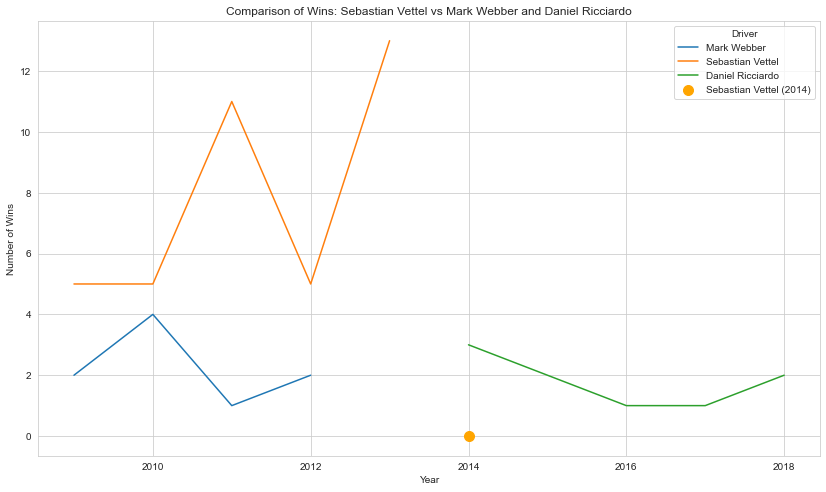

In [36]:
# Vettel competed against Mark Webber and Daniel Ricciardo at RBR
driver1 = "Sebastian Vettel"
driver2 = "Mark Webber"
driver3 = "Daniel Ricciardo"

# filter the df for the aforementioned drivers
seb_team = wins_by_driver[(wins_by_driver['Driver'].isin([driver1, driver2, driver3]))]

# create a line plot to compare wins
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

sns.lineplot(data=seb_team, x='Year', y='Wins', hue='Driver')
plt.scatter(2014, 0, color='orange', marker='o', s=100, label='{} (2014)'.format(driver1))

plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Comparison of Wins: {} vs {} and {}'.format(driver1, driver2, driver3))
plt.legend(title='Driver')
plt.show()

## Conclusions From Sketch Four:
When you take away the car from the equation, you find that Verstappen edges Vettel only slightly in wins vs. teammates; however, both have performed very favorably against their teammates. The graph does not illustrate the 0 wins that Vettel had in 2014, which would be the sole year he was outperformed by his teammate at Red Bull. A marker was placed there to provide a better visual of his performance against his teammates. Verstappen was mostly performing around Ricciardo's pace, with a single-win advantage over him throughout 2016 - 2018. The gap has significantly increased for Verstappen, especially throughout 2020 - present, including a 13-win margin over Sergio Perez in the 2022 season.

## Most Overtakes in Wins (Vettel, Verstappen):
The amount of overtakes versus wins was examined for Vettel and Verstappen to see how well the drivers performed when starting in later positions. 

## Sketch 5: Secondary Prototype Visual for Task 1 - Most Overtakes in Wins (Vettel, Verstappen)

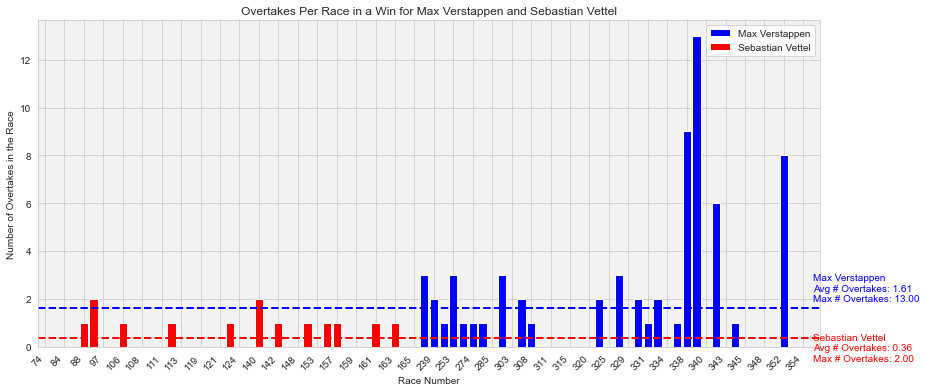

In [37]:
# create new overtakes_df to include just Max and Seb and race results = 1, or a win
overtakes_df = rb_final_df[rb_final_df['Driver'].isin(['Max Verstappen', 'Sebastian Vettel'])]
overtakes_df = overtakes_df[overtakes_df['Race Result'] == 1]

# define overtakes by taking the difference in start and race result and create a new column for overtakes
overtakes_df['Overtakes'] = overtakes_df['Start'] - overtakes_df['Race Result']

plt.figure(figsize=(14, 6))

# group the data by race no. and driver - calculate the sum of overtakes for each race and driver
grouped_df = overtakes_df.groupby(['Race no.', 'Driver'])['Overtakes'].sum().unstack()

# define colors for each driver; blue and red for RBR colors
colors = ['blue', 'red']

# iterate over each driver to plot their individual overtakes
for i, driver in enumerate(['Max Verstappen', 'Sebastian Vettel']):
    driver_df = grouped_df[driver]
    driver_df.plot(kind='bar', width=0.85, label=driver, color=colors[i])    

plt.xlabel('Race Number')
plt.ylabel('Number of Overtakes in the Race')
plt.title('Overtakes Per Race in a Win for {} and {}'.format('Max Verstappen', 'Sebastian Vettel'))
plt.xticks(range(0, len(grouped_df.index), 2), grouped_df.index[::2])    
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('#f2f2f2') # background for better visibility
plt.legend()

# find average overtakes for Max and Seb
average_overtake_max = overtakes_df[overtakes_df['Driver'] == 'Max Verstappen']['Overtakes'].mean()
average_overtake_seb = overtakes_df[overtakes_df['Driver'] == 'Sebastian Vettel']['Overtakes'].mean()

# plot avg. overtakes for both drivers to compare
plt.axhline(y=average_overtake_max, color='blue', linestyle='--', linewidth=2)
plt.axhline(y=average_overtake_seb, color='red', linestyle='--', linewidth=2)

# find max overtakes for Max and Seb
max_overtake_max = overtakes_df[overtakes_df['Driver'] == 'Max Verstappen']['Overtakes'].max()
max_overtake_seb = overtakes_df[overtakes_df['Driver'] == 'Sebastian Vettel']['Overtakes'].max()

# provide text box in chart to indicate the average and max overtakes for both Max and Seb
plt.text(len(overtakes_df) - 1, average_overtake_max + 0.2, f'Max Verstappen\nAvg # Overtakes: {average_overtake_max:.2f} \nMax # Overtakes: {max_overtake_max:.2f}', ha='left', va='bottom', color='blue')
plt.text(len(overtakes_df) - 1, average_overtake_seb + 0.2, f'Sebastian Vettel\nAvg # Overtakes: {average_overtake_seb:.2f} \nMax # Overtakes: {max_overtake_seb:.2f}', ha='left', va='top', color='red')

plt.show()

## Conclusion From Sketch Five:
From the visualization above we can conclude that Max Verstappen has a significantly higher amount of overtakes than Sebastian Vettel. The line graphs indicate the average amount of overtakes for each driver that occurred in wins at Red Bull Racing. The text box at the end of the graph details both the average and the max amount of overtakes for both drivers, in which Verstappen is significantly further ahead.

While we can conclude that Max is overtaking a lot more in races, and winning a race starting from the 14th position is very impressive, we have to further consider the fact that Vettel started on pole position a significant amount more based on this visualization. Being in pole position is an important feat in Formula 1, and indicates the driver was able to perform the fastest qualifying lap of the weekend. Knowing this, Vettel's performance in this graph is not considered bad because of the discrepancy in overtakes compared to Verstappen.

For the second task of this project, we look at how the drivers performed in qualifying and further look at this argument.

# Task 2: Who's qualified pole the most?
- **Why is this task pursued?:** The goal is to find out who is the most dominant driver in Red Bull Racing's history, and the second task in deciding the most dominant driver is to examine the total number of poles for each driver. A pole position in Formula 1 means that the driver on qualifying day had the fastest lap recorded around the track. This is another key metric for indicating success as a Formula 1 driver. 

- **How is this task conducted?:** A quick examnination of the overall total poles by each driver was considered the low fidelity prototype, which allowed the user to see which driver has the most pole positions overall. The second round of visualizations examined the pole margin to try and understand how much faster the top drivers were when they earned pole position. 

- **What does a task seek to learn about the data?:** The task seeks to learn which driver over the span of the 100 team wins of Red Bull Racing has the most pole positions, and who has the best margins for pole.

- **Where does the task operate?:** The target data in which the task operates are the statistics in which the author has found valuable to him in his experience watching Formula 1, specifically the margin of pole. This helps justify not only the number of pole positions earned by a driver, but the magnitude to the pole position. Other target data would include vehicle telemtry, to identify how the car is performing in concert with the driver.  

- **When is the task performed?:** The task is performed whenever additional qualifying sessions occur. This happens before every race, typically on Saturday. For this scenario, the only additional tasks to be performed for future Red Bull poles at this time is by Max Verstappen and Sergio Perez, the two current drivers for Red Bull Racing. The team can additionally introduce new drivers in the future; however, the scope of this project is to examine the first 100 wins for the team. 

- **Who is executing the task?:** The ones executing the tasks are the drivers. They are almost entirely responsible for the qualifying result. 

- **Why is this task pursued?:** The goal is to find out who is the most dominant driver in Red Bull Racing's history, and the second task in deciding the most dominant driver is to examine the total number of poles for each driver. A pole position in Formula 1 means that the driver on the qualifying day had the fastest lap recorded around the track. This is another key metric for indicating success as a Formula 1 driver.
- **How is this task conducted?:** A quick examination of the overall total poles by each driver was considered the low fidelity prototype, which allowed the user to see which driver has the most pole positions overall. The second round of visualizations examined the pole margin to try and understand how much faster the top drivers were when they earned pole positions.
- **What does a task seek to learn about the data?:** The task seeks to learn which driver throughout the 100 team wins of Red Bull Racing has the most pole positions, and who has the best margins for pole.
- **Where does the task operate?:** The target data in which the task operates are the statistics that the author has found valuable to him in his experience watching Formula 1, specifically the margin of a pole. This helps justify not only the number of pole positions earned by a driver but the magnitude of the pole position. Other target data would include vehicle telemetry, to identify how the car is performing in concert with the driver.
- **When is the task performed?:** The task is performed whenever additional qualifying sessions occur. This happens before every race, typically on Saturday. For this scenario, the only additional tasks to be performed for future Red Bull poles at this time are by Max Verstappen and Sergio Perez, the two current drivers for Red Bull Racing. The team can additionally introduce new drivers in the future; however, the scope of this project is to examine the first 100 wins for the team.
- **Who is executing the task?:** The ones executing the tasks are the drivers. They are almost entirely responsible for the qualifying result.


In [38]:
poles_by_driver = rb_final_df[rb_final_df['Start'] == 1].groupby(['Driver']).size().reset_index(name='Pole')

In [39]:
poles_by_driver

,Driver,Pole
0,Daniel Ricciardo,3
1,Mark Webber,13
2,Max Verstappen,25
3,Sebastian Vettel,45
4,Sergio Perez,3


## Sketch 6: Low Fidelity Prototype for Task 2 - Total Poles By Drivers 

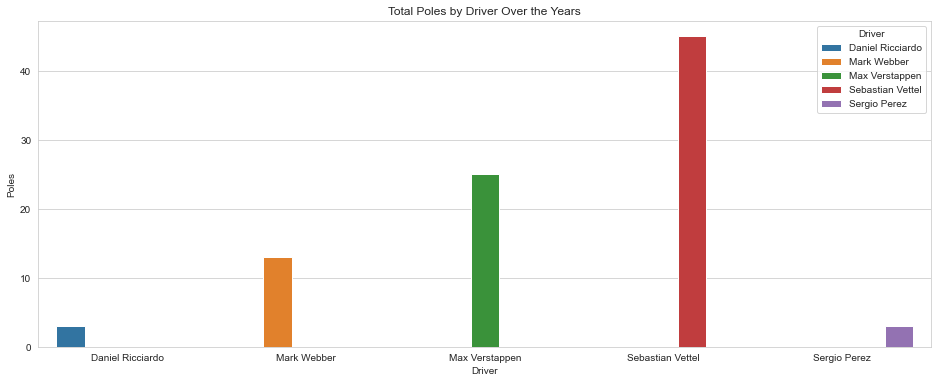

In [40]:
plt.figure(figsize=(16, 6))
sns.barplot(data=poles_by_driver, x='Driver', y='Pole', hue='Driver')
plt.xlabel('Driver')
plt.ylabel('Poles')
plt.title('Total Poles by Driver Over the Years')
plt.legend(title='Driver')
plt.show()

## Conclusion From Sketch Six:
We previously examined how these two drivers performed in terms of overtakes and saw that Vettel tended to start toward the front of the grid. This sketch confirms that Vettel has a significant advantage in terms of the number of poles vs. any other driver, and even further solidifies that Verstappen and Vettel are the only two obvious choices for most dominant Red Bull Racing drivers.

## Margin of Pole:
Starting in pole position proves that the representative was the fastest driver in the qualifying round. To further quantify this, we examine the margin of the pole position for both Verstappen and Vettel. 

In [41]:
poles_df = rb_final_df[rb_final_df['Driver'].isin(['Max Verstappen', 'Sebastian Vettel'])]
poles_df = poles_df[poles_df['Start'] == 1]
poles_df

,Year,Grand Prix,Circuit,Race no.,Driver,Chassis,Engine,Start,Win margin,Race Result,Pole margin
0,2009,China,Shanghai,74,Sebastian Vettel,RB5,Renault V8,1,10.970,1,0.197
1,2009,Turkey,Istanbul,78,Sebastian Vettel,RB5,Renault V8,1,NaN,3,0.105
2,2009,Britain,Silverstone,79,Sebastian Vettel,RB5,Renault V8,1,15.188,1,0.347
147,2009,Japan,Suzuka,84,Sebastian Vettel,RB5,Renault V8,1,NaN,1,NaN
4,2009,Japan,Suzuka,86,Sebastian Vettel,RB5,Renault V8,1,4.877,1,0.060
...,...,...,...,...,...,...,...,...,...,...,...
127,2023,Bahrain,Sakhir,348,Max Verstappen,RB19,Honda RBPT V6t,1,11.987,1,0.138
129,2023,Australia,Melbourne,350,Max Verstappen,RB19,Honda RBPT V6t,1,0.179,1,0.236
133,2023,Monaco,Monte Carlo,353,Max Verstappen,RB19,Honda RBPT V6t,1,27.921,1,0.084
134,2023,Spain,Catalunya,354,Max Verstappen,RB19,Honda RBPT V6t,1,24.090,1,0.462


## Sketch 7: Secondary Prototype for Task 2 - Pole Margins By Drivers (Vettel, Verstappen)

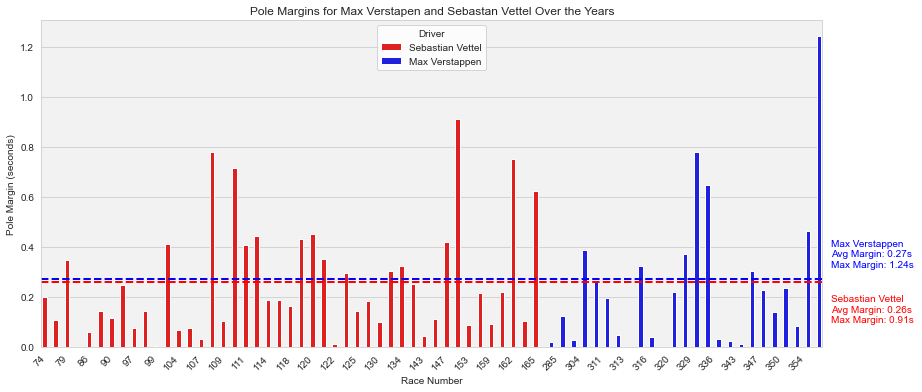

In [42]:
plt.figure(figsize=(14, 6))
sns.barplot(data=poles_df, x='Race no.', y='Pole margin', hue='Driver', palette = ['red', 'blue'])
plt.xlabel('Race Number')
plt.ylabel('Pole Margin (seconds)')   
plt.xticks(ticks=range(0, len(poles_df['Race no.']), 2), rotation=45, ha='right')
plt.title('Pole Margins for Max Verstapen and Sebastan Vettel Over the Years')
plt.gca().set_facecolor('#f2f2f2')
plt.legend(title='Driver')

average_margin_max = poles_df[poles_df['Driver'] == 'Max Verstappen']['Pole margin'].mean()
average_margin_seb = poles_df[poles_df['Driver'] == 'Sebastian Vettel']['Pole margin'].mean()

plt.axhline(y=average_margin_max, color='blue', linestyle='--', linewidth=2)
plt.axhline(y=average_margin_seb, color='red', linestyle='--', linewidth=2)

max_margin_max = poles_df[poles_df['Driver'] == 'Max Verstappen']['Pole margin'].max()
max_margin_seb = poles_df[poles_df['Driver'] == 'Sebastian Vettel']['Pole margin'].max()

plt.text(len(poles_df) + 0.3, average_margin_max + 0.05, f'Max Verstappen\nAvg Margin: {average_margin_max:.2f}s \nMax Margin: {max_margin_max:.2f}s', ha='left', color='blue')
plt.text(len(poles_df) + 0.3, average_margin_seb - 0.05, f'Sebastian Vettel\nAvg Margin: {average_margin_seb:.2f}s \nMax Margin: {max_margin_seb:.2f}s', ha='left', va='top', color='red')
plt.show()

## Conclusion From Sketch Seven:
Further examining the pole position significance, we include a visual tool to examine Verstappen and Vettel's pole margin (seconds in which they out-qualified the 2nd place driver). The average margin for poles earned is almost identical, with Verstappen being faster by 0.01 seconds. The max margin of earning pole favors Verstappen more, with a 0.35-second difference in the max pole margin earned by Verstappen vs. Vettel.

## Final Evaluation and Conclusions:
**The target question you want to answer:** Who’s the most dominant driver in Red Bull Racing’s 100-win history?

**The people you would recruit to answer that question:** If anything was possible, the top picks for recruits would include: professional Formula 1 enthusiast from multiple generations, current/previous drivers, Red Bull Racing Personnel (mechanics, strategists, technical engineers), etc. In a realistic world, anyone who has been a fan of Formula 1 for a long time can make sound opinions on the most dominant Red Bull driver over time. Having a diverse age range for this would go a long way as older generations will tend to have a bias toward Vettel, whereas newer generations will tend to have a bias toward Verstappen.

**The kinds of measures you would use to answer your data (e.g., insight depth, use cases, accuracy) and what these measures would tell you about the core question:** I used insight depth measures to answer the data. Examination of one visual lead to a further analysis with additional variables. This approach was utilized in terms of the Task Numbers, and low-fidelity and secondary prototype sketches. 

**The approach you will use to answer that question (e.g., a journaling study, a formal experiment, etc.):** I believe a journaling study that outlined the previously recruited group's opinions on who the most dominant driver before and after examining all the statistics would be the most applicable approach. Having this in person as a discussion would be the most beneficial.

**How you would instantiate those methods (i.e., what would your participants do?):** The participants would fill out a survey indicating their choice for the driver they think is the most dominant, then meet with the other recruits to hold a discussion and view the visuals and statistics outlined, then fill out the same survey again following. This would show the effectiveness of the visual tools amongst professionals, and to better dictate whether or not there is a clear, correct answer.

**What criteria would you use to indicate that your visualization was successful?:** While the project did not specifically outline the most dominant driver in Red Bull Racing's 100-win history, it outlined several key factors that showed that the top two are very neck and neck. I would rate this criteria and use of visualization as successful if I asked someone who was very familiar with Formula 1 the target question and was able to sway their answer, even slightly toward the other option.

**A summary of the key elements of your design and accompanying justification?:** The key elements of my design include using various visualization tools to indicate the success of a driver versus another driver.

**A discussion of your final evaluation approach, including the procedure, people recruited, and results. Note that, due to the difficulty of recruiting experts, you can use colleagues, friends, classmates, or family to evaluate your designs if experts or others from your target population are unavailable.:** I used a summative, insight-based, qualitative evaluation approach, where I learned something new about a specific task and continued to elaborate on it further after the process had been built. In my evaluation process, I recruited two close friends who both watch Formula 1 and initially asked their opinions on who the most dominant Red Bull Racing driver was. My first friend, who is an avid Formula 1 fan and has a good knowledge of the history of the sport, initially said Verstappen, but quickly retraced their steps and said, Vettel. My second friend moderately keeps up with the sport and immediately said Verstappen. The first friend was not overly shocked to see that Verstappen was a lot closer to Vettel than they had realized but was still surprised to see some of the details that favor Verstappen at that magnitude (specifically the overtakes). My second friend was convinced as well that each of the two was fairly neck and neck and it would be hard to decide one over the other.

**A synthesis of your findings, including what elements of your approach worked well and what elements you would refine in future iterations.:** Overall, it's very difficult to factually determine who the most dominant driver in Red Bull Racing's history would be, but we can narrow it down to two drivers, Max Verstappen or Sebastian Vettel, with a good amount of certainty. When examining both tasks, we find that Verstappen has the most wins and Vettel has the most pole positions earned, but the margins between the two drivers are very close.

Examining the overall win streaks for each driver, we find that Vettel has the longest win streak with Red Bull Racing at 9 wins in a row. This feature is currently the record in Formula 1 for win streaks. Verstappen's longest win streak currently sits at 5, which is significantly lower than Vettel's. In this example, Vettel edges Verstappen.
Diving deeper into the wins we find that both drivers perform very well against their teammates, which takes the car out of the equation to focus solely on the driver's skills, with Verstappen holding a slight edge over Vettel (more seasons with more wins than teammate, and bigger win margins per season).

The last visualization for the wins task examined the number of overtakes that occurred in each win for Verstappen and Vettel. The visual tools used in this example indicated that Verstappen averages about 1.6 overtakes per Grand Prix. His largest overtake number during a win included an incredible 13-position climb from 14th to 1st in Race No. 339. Vettel's average overtake count is 0.36, which is significantly lower than Verstappen, with his max overtakes in a win being 2. While the number of overtakes proves that Verstappen is capable of making first place without starting towards the top, it doesn't prove that for Vettel. This makes Verstappen look like the more dominant driver, but the visual tool also shows that Vettel is starting towards the top more frequently, which indicates a lot of success in the qualifying run, and more pole position starts.

Bridging the overtakes example into our second task, we looked at how these two drivers performed in the qualifying round by examining each of the driver's pole positions earned. While the number of wins only slightly favored Verstappen, the number of poles favored Vettel by a good margin (as previously predicted in the overtakes example). Further examining the pole position significance, we include a visual tool to examine Verstappen and Vettel's pole margin (seconds in which they out-qualified the 2nd place driver). The average margin for poles earned is almost identical, with Verstappen being faster by 0.01 seconds. The max margin of earning pole favors Verstappen more, with a 0.35-second difference in the max pole margin earned by Verstappen vs. Vettel.

To better refine this project in the future, we'd have to consider all twenty drivers on the grid each year and the vehicle telemetry data (tire degradation, pit strategy, etc.). The telemetry data could significantly impact these results, as vehicle issues were not well portrayed in the illustrations above. These types of projects would require an extensive amount of data and processing power and were omitted for this reason.